# Weights analysis

In [36]:
import seaborn as sns
import torch
import sklearn
import pandas as pd
import numpy as np
from artemis.emotions import ARTEMIS_EMOTIONS
import matplotlib.pyplot as plt


%config InlineBackend.figure_format ='retina'

In [37]:
from sklearn import metrics

## Direction analysis

In [58]:
model_path = "../../neural_checkpoints/C-RN50x16"
parameters = list(torch.load(model_path).values())[0]
parameters.shape

torch.Size([9, 768])

In [59]:
matrix = metrics.pairwise.cosine_similarity(parameters.detach().cpu().numpy(),
                                                    parameters.detach().cpu().numpy())
df_sim = pd.DataFrame(np.tril(matrix) , columns=ARTEMIS_EMOTIONS)
df_sim["emotions"] = pd.Series(ARTEMIS_EMOTIONS)
df_sim = df_sim.set_index("emotions")
params = pd.DataFrame(parameters.detach().cpu().numpy()).T

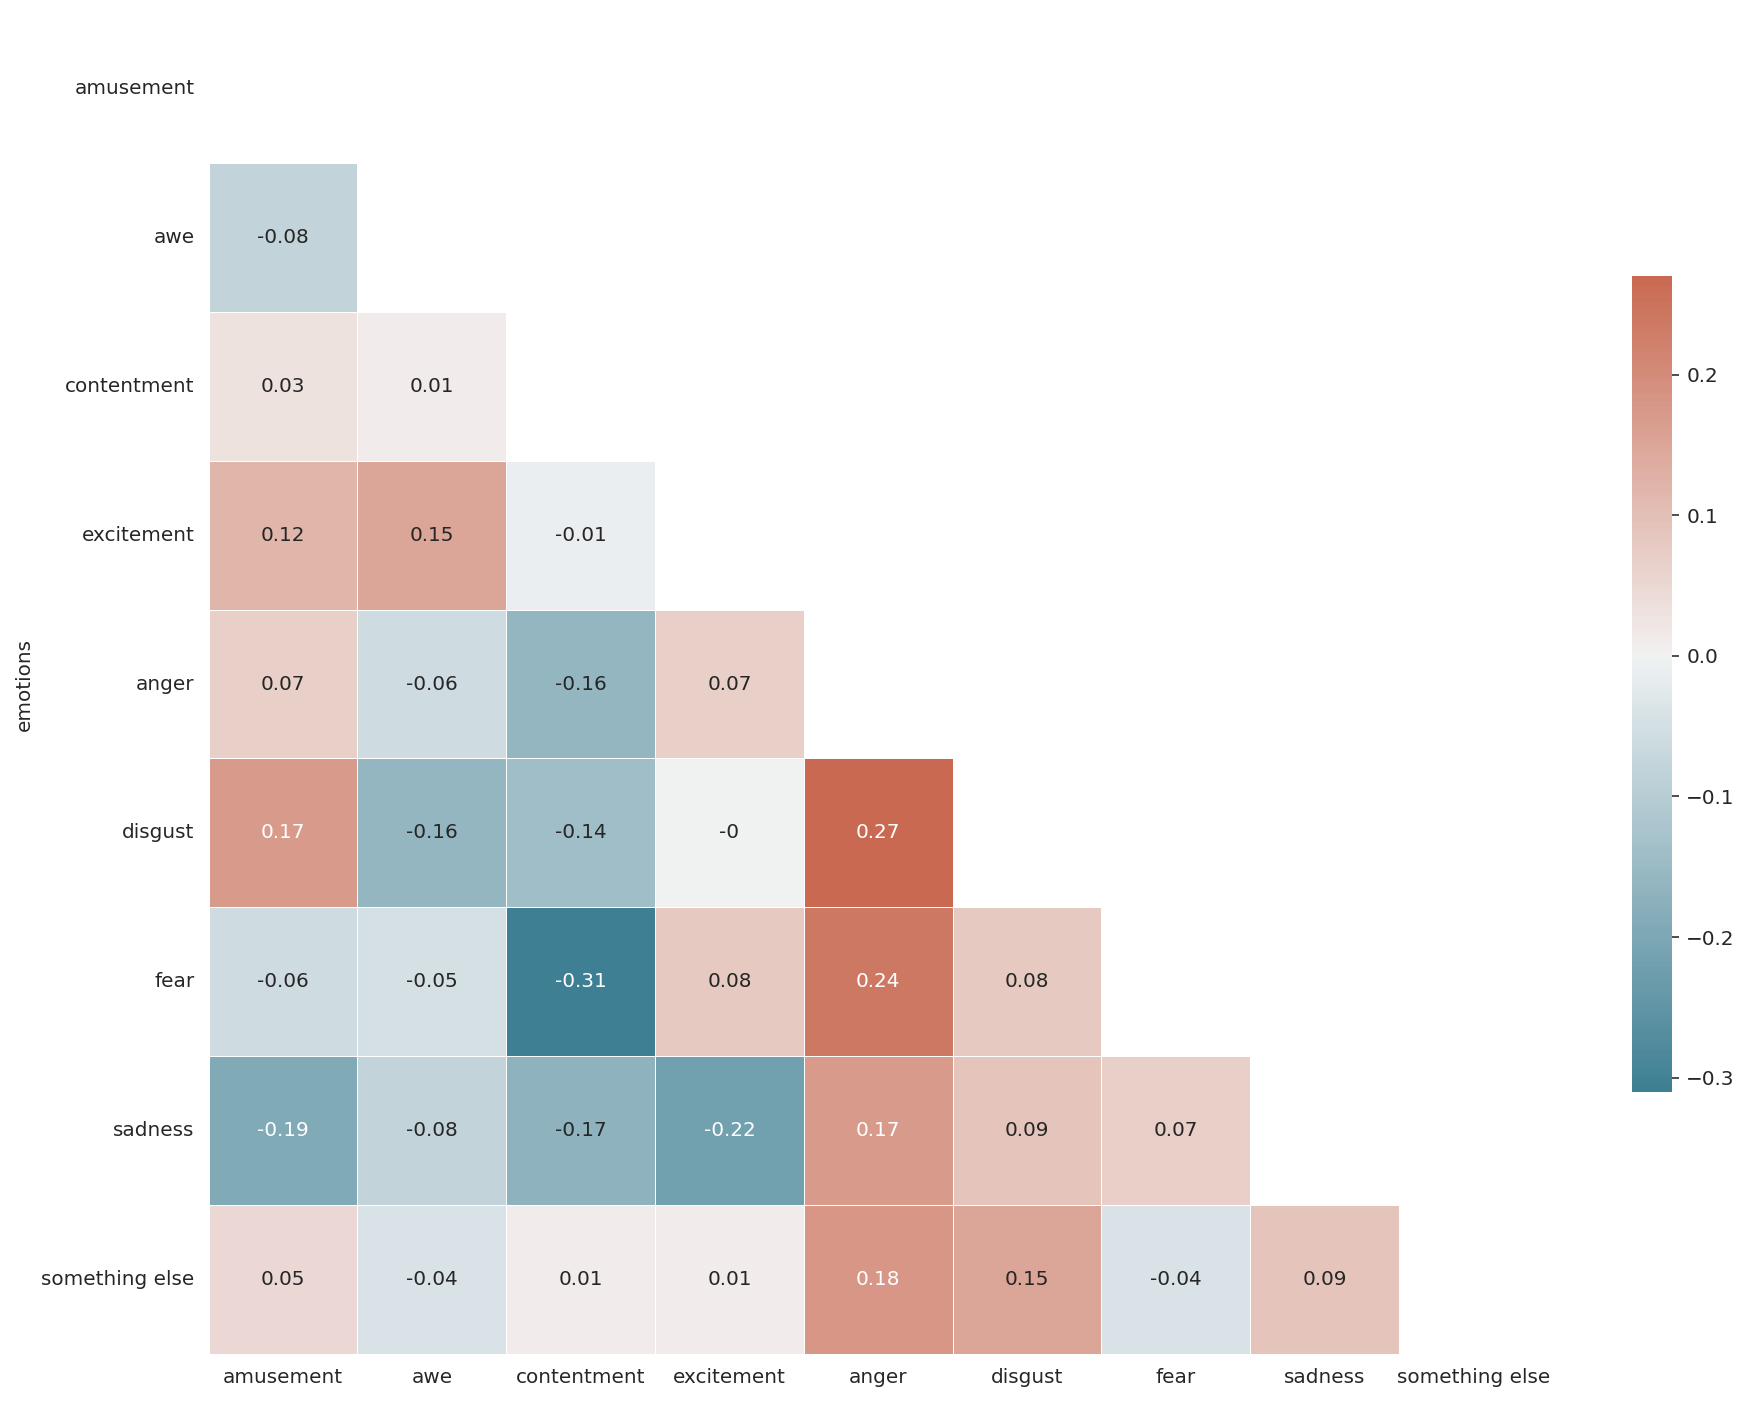

In [63]:
sns.set_style("white")

mask = ~np.tril(np.ones_like(np.triu(matrix), dtype=bool)) 
mask = np.triu(np.ones_like(matrix, dtype = bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(15,15))
fig = sns.heatmap(df_sim.round(2), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
fig.set_yticklabels(fig.get_xticklabels(), rotation=0, horizontalalignment='right');
#plt.savefig("../results/dimensions/RN50x16_correlations.pdf", bbox_inches  = "tight")